In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import os

In [2]:
# Read csv data file
file_path = "../Resources/MovieData_Clean.csv"
movie_data = pd.read_csv(file_path)
movie_data

,TMDB ID,Title,Release Date,Budget,Revenue,IMDB ID,Rating,Runtime,Genre,Director,...,IMDB Rating,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Year of Release,Revenue (Millions),Runtime (Min),Primary Genre
0,13971,Wild Child,2008-01-01,20000000.0,2.197234e+07,tt1024255,PG-13,124 min,"Comedy, Drama, Romance",Nick Moore,...,6.1,"46,716",17 Nov 2009,Universal Pictures,Tuesday,January,2008,21.972336,124.0,Comedy
1,14423,First Sunday,2008-01-11,0.0,3.880462e+07,tt0486578,PG-13,96 min,"Comedy, Crime, Drama",David E. Talbert,...,4.5,"9,203",13 May 2008,NaN,Friday,January,2008,38.804615,96.0,Comedy
2,7191,Cloverfield,2008-01-15,25000000.0,1.707640e+08,tt1060277,PG-13,85 min,"Horror, Sci-Fi, Thriller",Matt Reeves,...,7.0,"358,331",22 Apr 2008,Paramount,Tuesday,January,2008,170.764026,85.0,Horror
3,13121,Teeth,2008-01-18,2000000.0,2.340110e+06,tt0780622,R,94 min,"Comedy, Fantasy, Horror, Thriller",Mitchell Lichtenstein,...,5.4,"39,939",06 May 2008,Roadside Attractions,Friday,January,2008,2.340110,94.0,Comedy
4,6687,Transsiberian,2008-01-18,15000000.0,5.926410e+06,tt0800241,R,111 min,"Crime, Drama, Mystery, Thriller",Brad Anderson,...,6.7,"48,581",04 Nov 2008,First Look,Friday,January,2008,5.926410,111.0,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,297802,Aquaman,2018-12-21,160000000.0,1.143689e+09,tt1477834,PG-13,143 min,"Action, Adventure, Fantasy, Sci-Fi",James Wan,...,7.0,"319,236",NaN,Warner Bros. Pictures,Friday,December,2018,1143.689193,143.0,Action
2054,503616,Second Act,2018-12-21,16000000.0,7.228223e+07,tt2126357,PG-13,103 min,"Comedy, Drama, Romance",Peter Segal,...,5.8,"18,337",12 Mar 2019,STXfilms,Friday,December,2018,72.282227,103.0,Comedy
2055,424783,Bumblebee,2018-12-21,135000000.0,4.658950e+08,tt4701182,PG-13,114 min,"Action, Adventure, Sci-Fi",Travis Knight,...,6.8,"115,881",02 Apr 2019,Paramount Pictures,Friday,December,2018,465.895025,114.0,Action
2056,426563,Holmes & Watson,2018-12-25,42000000.0,4.046279e+07,tt1255919,PG-13,90 min,"Comedy, Crime, Mystery",Etan Cohen,...,3.8,"24,394",09 Apr 2019,Columbia Pictures,Tuesday,December,2018,40.462793,90.0,Comedy


In [3]:
# Drop blanks (Runtime) and TV movies (Rating)
# Sort movie runtime from shortest to longest
movie_data = movie_data.dropna(subset=['Runtime (Min)'])
movie_data = movie_data[~movie_data['Rating'].isin(['TV'])]
sort_time = movie_data.sort_values("Runtime (Min)")

# Identify how I want cut the bins
max = sort_time["Runtime (Min)"].max()
min = sort_time["Runtime (Min)"].min()
print(f"The longest movie runtime is {max} mins.")
print(f"The shortest movie runtime is {min} mins.")

The longest movie runtime is 212.0 mins.
The shortest movie runtime is 3.0 mins.


In [4]:
# Identify runtime outliers
Q1 = np.percentile(sort_time['Runtime (Min)'], 25)
print("(Q1) Lower Quartile: %s"%(Q1))

Q2 = np.percentile(sort_time['Runtime (Min)'], 50)
print("(Q2) Median: %s"%(Q2))

Q3 = np.percentile(sort_time['Runtime (Min)'], 75)
print("(Q3) Upper Quartile: %s"%(Q3))

IQR = Q3 - Q1
print("Interquartile Range: %s"%(IQR))

upper_boundary = Q3 + (1.5 * IQR)
print("Upper Boundary: %s"%(upper_boundary))

lower_boundary = Q1 - (1.5 * IQR)
print("Lower Boundary: %s"%(lower_boundary))

# Remove any outliers (lower boundary)
sort_time = sort_time[sort_time['Runtime (Min)']>= lower_boundary]
sort_time

(Q1) Lower Quartile: 96.0
(Q2) Median: 106.0
(Q3) Upper Quartile: 118.0
Interquartile Range: 22.0
Upper Boundary: 151.0
Lower Boundary: 63.0


,TMDB ID,Title,Release Date,Budget,Revenue,IMDB ID,Rating,Runtime,Genre,Director,...,IMDB Rating,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Year of Release,Revenue (Millions),Runtime (Min),Primary Genre
887,61012,Silent Hill: Revelation 3D,2012-10-26,20000000.0,52302796.0,tt4445580,NaN,63 min,Documentary,Eric Pinéda,...,NaN,NaN,NaN,NaN,Friday,October,2012,52.302796,63.0,Documentary
637,51162,Winnie the Pooh,2011-07-14,30000000.0,14460000.0,tt1449283,G,63 min,"Animation, Adventure, Comedy, Family, Musical","Stephen J. Anderson, Don Hall",...,7.2,"20,335",25 Oct 2011,Walt Disney Pictures,Thursday,July,2011,14.460000,63.0,Animation
1031,132363,The Butler,2013-08-16,25000000.0,115922175.0,tt5072816,NaN,70 min,Thriller,César Caro Cruz,...,7.6,413,NaN,NaN,Friday,August,2013,115.922175,70.0,Thriller
34,11918,Superhero Movie,2008-03-27,35000000.0,25871834.0,tt0426592,PG-13,75 min,"Action, Comedy",Craig Mazin,...,4.5,"61,135",08 Jul 2008,The Weinstein Company/Dimension Films,Thursday,March,2008,25.871834,75.0,Action
1003,181330,Kevin Hart: Let Me Explain,2013-07-03,0.0,32230907.0,tt2609912,R,75 min,"Documentary, Comedy","Leslie Small, Tim Story",...,6.8,"8,075",15 Oct 2013,Summit Entertainment,Wednesday,July,2013,32.230907,75.0,Documentary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,83542,Cloud Atlas,2012-10-26,102000000.0,130482868.0,tt1371111,R,172 min,"Action, Drama, Mystery, Sci-Fi","Tom Tykwer, Lana Wachowski, Lilly Wachowski",...,7.4,"332,780",14 May 2013,Warner Bros. Pictures,Friday,October,2012,130.482868,172.0,Action
1100,106646,The Wolf of Wall Street,2013-12-25,100000000.0,392000694.0,tt0993846,R,180 min,"Biography, Crime, Drama",Martin Scorsese,...,8.2,"1,083,088",25 Mar 2014,Paramount Studios,Wednesday,December,2013,392.000694,180.0,Biography
1063,152584,Blue Is the Warmest Color,2013-10-25,4300000.0,10165694.0,tt2278871,NC-17,180 min,"Drama, Romance",Abdellatif Kechiche,...,7.7,"128,462",25 Feb 2013,IFC Films,Friday,October,2013,10.165694,180.0,Drama
1375,338517,The Dawns Here Are Quiet,2015-05-22,3300000.0,5249225.0,tt0068161,PG-13,188 min,"Drama, History, War",Stanislav Rostotskiy,...,8.3,"3,133",21 Jun 2005,NaN,Friday,May,2015,5.249225,188.0,Drama


In [5]:
# Organize movie runtimes to bins
bins = [60, 90, 120, 180, 240]
group_names = ["60-90mins", "91-120mins", "121-180mins", "181-240mins"]
colors = ["red", "blue", "green", "orange"]
sort_time["Movies Runtime Grouped(Mins)"] = pd.cut(sort_time["Runtime (Min)"], bins, labels=group_names)
sort_time

,TMDB ID,Title,Release Date,Budget,Revenue,IMDB ID,Rating,Runtime,Genre,Director,...,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Year of Release,Revenue (Millions),Runtime (Min),Primary Genre,Movies Runtime Grouped(Mins)
887,61012,Silent Hill: Revelation 3D,2012-10-26,20000000.0,52302796.0,tt4445580,NaN,63 min,Documentary,Eric Pinéda,...,NaN,NaN,NaN,Friday,October,2012,52.302796,63.0,Documentary,60-90mins
637,51162,Winnie the Pooh,2011-07-14,30000000.0,14460000.0,tt1449283,G,63 min,"Animation, Adventure, Comedy, Family, Musical","Stephen J. Anderson, Don Hall",...,"20,335",25 Oct 2011,Walt Disney Pictures,Thursday,July,2011,14.460000,63.0,Animation,60-90mins
1031,132363,The Butler,2013-08-16,25000000.0,115922175.0,tt5072816,NaN,70 min,Thriller,César Caro Cruz,...,413,NaN,NaN,Friday,August,2013,115.922175,70.0,Thriller,60-90mins
34,11918,Superhero Movie,2008-03-27,35000000.0,25871834.0,tt0426592,PG-13,75 min,"Action, Comedy",Craig Mazin,...,"61,135",08 Jul 2008,The Weinstein Company/Dimension Films,Thursday,March,2008,25.871834,75.0,Action,60-90mins
1003,181330,Kevin Hart: Let Me Explain,2013-07-03,0.0,32230907.0,tt2609912,R,75 min,"Documentary, Comedy","Leslie Small, Tim Story",...,"8,075",15 Oct 2013,Summit Entertainment,Wednesday,July,2013,32.230907,75.0,Documentary,60-90mins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,83542,Cloud Atlas,2012-10-26,102000000.0,130482868.0,tt1371111,R,172 min,"Action, Drama, Mystery, Sci-Fi","Tom Tykwer, Lana Wachowski, Lilly Wachowski",...,"332,780",14 May 2013,Warner Bros. Pictures,Friday,October,2012,130.482868,172.0,Action,121-180mins
1100,106646,The Wolf of Wall Street,2013-12-25,100000000.0,392000694.0,tt0993846,R,180 min,"Biography, Crime, Drama",Martin Scorsese,...,"1,083,088",25 Mar 2014,Paramount Studios,Wednesday,December,2013,392.000694,180.0,Biography,121-180mins
1063,152584,Blue Is the Warmest Color,2013-10-25,4300000.0,10165694.0,tt2278871,NC-17,180 min,"Drama, Romance",Abdellatif Kechiche,...,"128,462",25 Feb 2013,IFC Films,Friday,October,2013,10.165694,180.0,Drama,121-180mins
1375,338517,The Dawns Here Are Quiet,2015-05-22,3300000.0,5249225.0,tt0068161,PG-13,188 min,"Drama, History, War",Stanislav Rostotskiy,...,"3,133",21 Jun 2005,NaN,Friday,May,2015,5.249225,188.0,Drama,181-240mins


  Runtime Grouped  Counts
0       60-90mins     246
1      91-120mins    1347
2     121-180mins     445
3     181-240mins       2


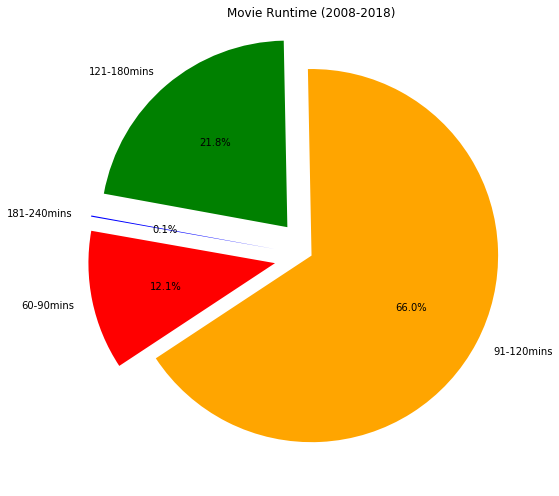

In [6]:
# Organize movie runtimes to bins
bins = [60, 90, 120, 180, 240]
group_names = ["60-90mins", "91-120mins", "121-180mins", "181-240mins"]
colors = ["red", "blue", "green", "orange"]
sort_time["Movies Runtime Grouped(Mins)"] = pd.cut(sort_time["Runtime (Min)"], bins, labels=group_names)

# Create a bar plot to show most common movie run time
time_counts = sort_time["Movies Runtime Grouped(Mins)"].value_counts(sort=False)
df_val_counts = pd.DataFrame(time_counts)
df_val_counts = df_val_counts.reset_index()
df_val_counts.columns = ['Runtime Grouped', 'Counts']
print(df_val_counts)


colors = ["red", "orange", "green", "blue"]
explode = (0.2, 0, 0.2, 0.2)
fig = plt.figure(figsize=(10, 7))
plt.pie(df_val_counts["Counts"], explode=explode, labels=group_names, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=170, radius=1)
plt.title("Movie Runtime (2008-2018)")
plt.tight_layout()

plt.show()

save_file = os.path.join("..", "Images", "Movie Runtime Pie Chart.png")
fig.savefig(save_file)

The P-Value is: 0.00000000


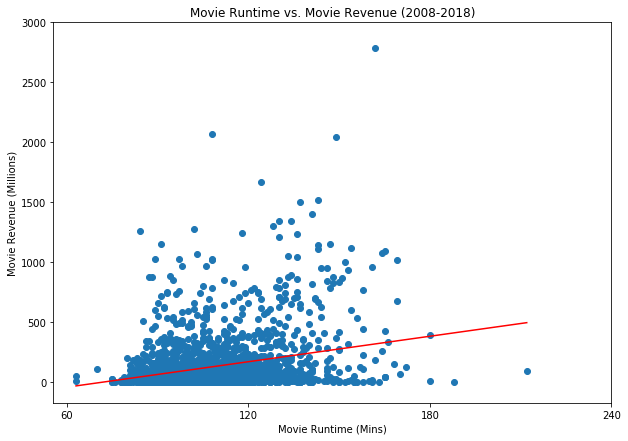

In [7]:
# Create a Scatter plot to show correlation between movie runtime and revenue
x = sort_time["Runtime (Min)"]
y = sort_time["Revenue (Millions)"]

fig = plt.figure(figsize=(10, 7))
plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
plt.plot(x, regress_values, "r-")
plt.xlabel("Movie Runtime (Mins)")
plt.ylabel("Movie Revenue (Millions)")
plt.title("Movie Runtime vs. Movie Revenue (2008-2018)")
plt.xticks(np.arange(60, 300, 60))
plt.yticks(np.arange(0, 3500, 500))
print(f"The P-Value is: {'{:0,.8f}'.format(pvalue)}")
plt.show()

save_file = os.path.join("..", "Images", "Movie Runtime vs Rev Scatter.png")
fig.savefig(save_file)

The P-Value is: 0.00000000


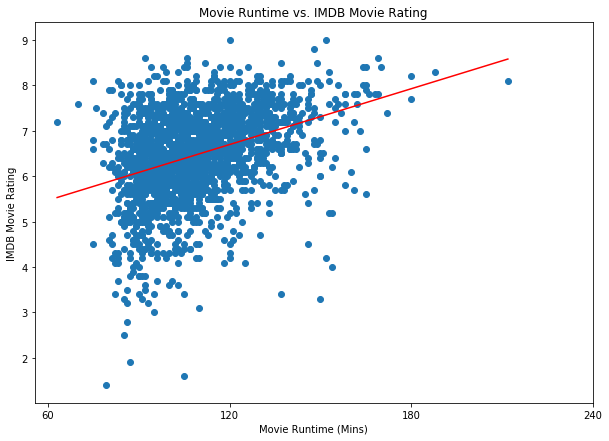

In [8]:
# Remove records with null or zero values for IMDB Rating
sort_time["IMDB Rating"] = sort_time["IMDB Rating"].fillna(0)
sort_time["IMDB Rating"] = sort_time["IMDB Rating"].astype(float)
sort_time = sort_time[sort_time["IMDB Rating"] > 0]

# Create a Scatter plot to show correlation between movie runtime and IMDB Rating
x = sort_time["Runtime (Min)"]
y = sort_time["IMDB Rating"]

fig = plt.figure(figsize=(10, 7))
plt.scatter(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
plt.plot(x, regress_values, "r-")
plt.ylabel("IMDB Movie Rating")
plt.xlabel("Movie Runtime (Mins)")
plt.title("Movie Runtime vs. IMDB Movie Rating")
plt.xticks(np.arange(60, 300, 60))
print(f"The P-Value is: {'{:0,.8f}'.format(pvalue)}")
plt.show()


save_file = os.path.join("..", "Images", "Movie Runtime vs Rating Scatter.png")
fig.savefig(save_file)
      